# Workshop week 6: Deep Learning and Reinforcement Learning

## 1. MNIST dataset classification using CNN

In Week 11 you learned that Convolutional Neural Network (CNN) is a neural network architecture used to classify images. <br>
In this activity, you will learn how to apply CNN to recognise hand-written digits to classify them into 0-9 digits.<br>
This is a simple version of a much larger application that converts handwriting into computer recognised text.

Before starting this task, please refresh your knowledge from Week 11 Online Learning and lecture.



(https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/)

### Activity 1: Creating CNN for image classification

In this activity, you will create a configuration of CNN as specfied. Please complete the code in the indicated places. You can work in groups and consult each other on how to do it efficiently. Keras APIs documentation can be found here: https://keras.io/api/.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


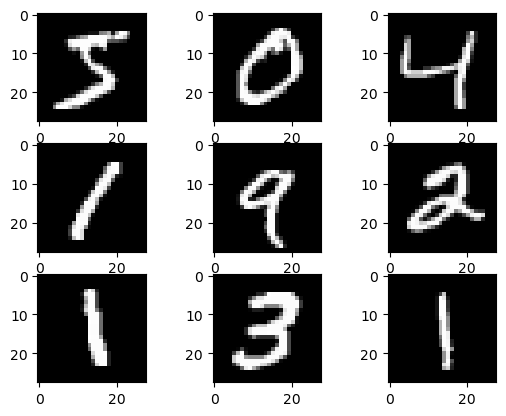

In [1]:
# load the dataset and plot the first 9 digints
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [2]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [3]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    return trainX, trainY, testX, testY

In [4]:
# scale pixels
def prep_pixels(train, test):

    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    # return normalized images
    return train_norm, test_norm

In [5]:
# define cnn model with 3 conv layers and relu activation, followed by fully connected NN 
# with relu activation in first layer and softmax in the output layer.
# Initialy  use learnign rate = 0.01 and momentum = 0.9, use categorical_crossentropy loss function.

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [11]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='green', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='green', label='test')
        plt.tight_layout()
    plt.show()

> 98.642
> 98.758
> 98.608
> 98.858
> 98.733


C:\Users\a1231060\AppData\Local\Temp\ipykernel_14472\2161838597.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


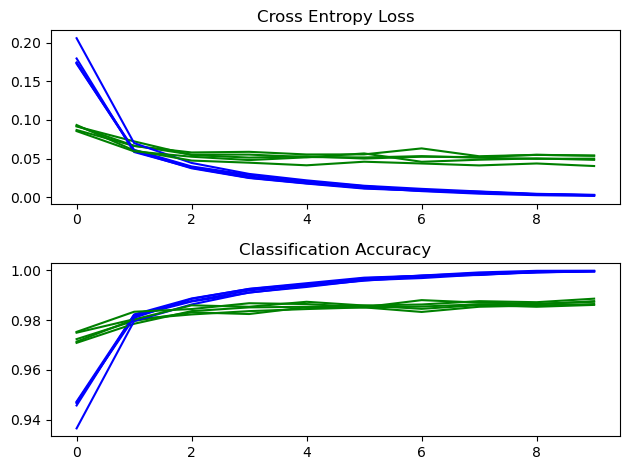

In [12]:
# run the test harness for evaluating a model
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

# evaluate model
scores, histories = evaluate_model(trainX, trainY)
# learning curves
summarize_diagnostics(histories)

### Activity 2: Discuss the results

Analyse the output charts and answer the following questions:
1. What would be the number of epochs sufficient to obtain good classification results?
2. What CNN parameters would you change to improve results?

Your workshop instructor may have some more questions to discuss.

## 2. Reinforcement Learning

Reinforcement learning (RL) is a subset of machine learning that allows an AI-driven system (sometimes referred to as an agent) to learn through trial and error using feedback from its actions.

One example is Q-Learning. Q-learning is a machine learning approach that enables a model to iteratively learn and improve over time by taking the correct action. 

### Activity 3: Read the following article and answer the below questions. 

Article: https://www.techtarget.com/searchenterpriseai/definition/Q-learning


1. Describe the components involved in reinforcement learning, such as agents, states, actions, rewards, episodes, and Q-values.
2. How does the off-policy approach work in Q-learning, and what role do Q-values play in achieving this approach?
3. What is a Q-table, and how is it utilized in reinforcement learning?
4. Explain the relationship between the Q-table and the Q-function in the context of reinforcement learning.
5. What are the advantages of using a Q-learning approach in reinforcement learning?


##### Answers

1. Components include the agent (operates in the environment), states (current positions), actions (agent's operations), rewards (positive/negative response), episodes (terminated actions), and Q-values (expected future values).
2. The off-policy approach in Q-learning is a key aspect of its flexibility and ability to optimize without being strictly tethered to a predefined policy. In off-policy learning, the agent learns the optimal action values (Q-values) independently of the policy it's following or the policy from which the data is sampled. 
3. A Q-table is a critical element in reinforcement learning, specifically Q-learning. It's a data structure storing Q-values, representing expected cumulative future rewards for actions in different states. Rows signify different situations, columns represent actions, and values are updated as the agent interacts with the environment. The Q-table guides the agent's decision-making, helping it choose actions with the highest Q-values for optimal outcomes. This iterative process refines the agent's understanding, contributing to continuous improvement in decision-making capabilities.
4. The Q-table and the Q-function are interrelated components in reinforcement learning, particularly in Q-learning. The Q-table is a structured representation of Q-values, indicating the expected rewards for actions in specific states. On the other hand, the Q-function is a mathematical equation evaluating the current state and action to predict future rewards. The Q-table essentially serves as a practical implementation of the Q-function, allowing the agent to look up and apply learned values during decision-making, fostering optimized behavior over time.
5. The Q-learning approach in reinforcement learning offers advantages such as being model-free, allowing flexibility across various problems and environments, and enabling offline training with pre-collected datasets. It excels in scenarios where the dynamics of the environment are challenging to model or unknown, providing adaptability and optimization without strict policy adherence.